In [29]:
""" You must rename the folder containing the csv's to \'data\' """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [45]:
wellness = pd.read_csv(filepath_or_buffer='./data/wellness.csv')
gps = pd.read_csv(filepath_or_buffer='./data/gps.csv')
games = pd.read_csv(filepath_or_buffer='./data/games.csv')
rpe = pd.read_csv(filepath_or_buffer='./data/rpe.csv')

In [13]:
wellness.Date = pd.to_datetime(wellness.Date, format="%Y-%m-%d")

In [17]:
date_wellness = wellness.set_index(['Date','PlayerID'])
date_wellness.head(5)

Fatigue  Soreness  Desire  Irritability   BedTime  \
Date       PlayerID                                                      
2018-07-21 1               3         3       2             3  23:00:00   
           2               4         3       4             4  23:00:00   
           3               3         3       5             4  22:30:00   
           4               2         3       5             4  00:30:00   
           5               5         3       4             4  23:45:00   

                     WakeTime  SleepHours  SleepQuality  MonitoringScore Pain  \
Date       PlayerID                                                             
2018-07-21 1         07:00:00        8.00             2               13   No   
           2         07:00:00        8.00             4               19  Yes   
           3         06:30:00        8.00             4               19   No   
           4         07:00:00        6.50             1               15   No   
           5         07:00:00        7.25             4               20   No   

                    Illness Menstruation  Nutrition NutritionAdjustment  \
Date       PlayerID                                                       
2018-07-21 1             No          Yes  Excellent                 Yes   
           2             No          Yes        NaN                 NaN   
           3             No           No        NaN                 NaN   
           4             No          Yes  Excellent                 Yes   
           5             No           No       Okay                 Yes   

                    USGMeasurement    USG TrainingReadiness  
Date       PlayerID                                          
2018-07-21 1                    No    NaN                0%  
           2                   Yes  1.010                0%  
           3                   Yes  1.016              100%  
           4                   Yes  1.025               95%  
           5                   Yes  1.022              100%

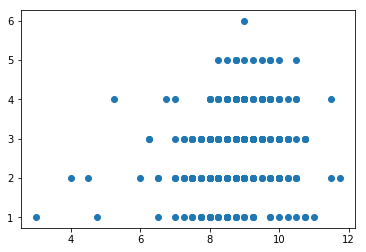

In [44]:
player_wellness = date_wellness.swaplevel().sort_index()
plt.scatter(player_wellness.loc[1].SleepHours.values, player_wellness.loc[1].Fatigue.values)


In [86]:
summation = 0
for item in gps.groupby('GameID').PlayerID.unique():
    summation += len(item)
    
print(summation)

448


In [85]:
max([len(groups) for groups in gps.groupby('GameID').groups.values()])

189107

In [201]:
tsne_mat = np.zeros((448,189107*4))

In [202]:
i = 0
j = 0
for group in gps.groupby('GameID').groups.values():
    for player in gps.loc[group].groupby('PlayerID').groups.values():
        for x in np.array(gps.loc[player].AccelX):
            tsne_mat[i,j] = x
            j+=1
        j = 189107
        for y in np.array(gps.loc[player].AccelY):
            tsne_mat[i,j] = y
            j+=1
        j = 189107*2
        for z in np.array(gps.loc[player].AccelZ):
            tsne_mat[i,j] = z
            j+=1
        j = 189107*3
        for load in np.array(gps.loc[player].AccelLoad):
            tsne_mat[i,j] = load
            j+=1
        i+=1
        j = 0
        

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit()

Text(0,0.5,'cumulative explained variance')

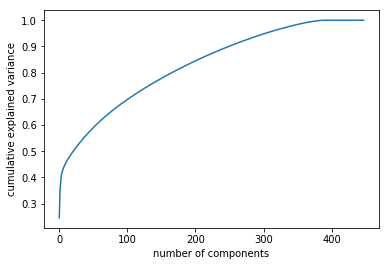

In [203]:
from sklearn.decomposition import PCA
pca = PCA().fit(tsne_mat)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [204]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(tsne_mat)

In [217]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2,perplexity=25,n_iter=600).fit_transform(tsne_mat)
print(embedding.shape)

(448, 2)


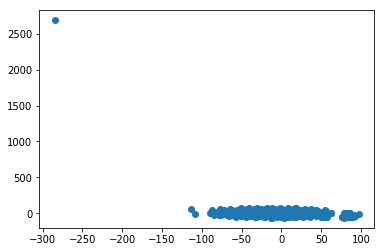

In [218]:
plt.scatter(embedding[:,0],embedding[:,1])